In [3]:
import cv2 as cv
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics
import re

In [5]:
# path = "/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP1/"
TP="TP2"
# print(path) 
def RGB(path):
    all_files=glob.glob(os.path.join(path, '*.PNG'))
    Color=[]
    for files in all_files:
        img=cv.imread(files)
        img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R=[]
        G=[]
        B=[]
        h=img.shape[0]
        w=img.shape[1]
        Image=os.path.basename(files).split('.')[0]
        for height in range(h):
            # print(height)
            for width in range(w):
                # print(height, width)
                r,g,b = img[height, width]
                GLI=(2*g-r-b)/(2*g+r+b)
                
                NGRDIupper=g.astype(float)-r.astype(float)
                NGRDIlower=g.astype(float)+r.astype(float)
                NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))
                # print(r,g,b,GLI,NGRDI)
#                 print(type(r),type(g),type(b),type(GLI),type(NGRDI))
            

                Color.append(
                    {'file':Image,
                     'Red':r,
                     'Green':g,
                     'Blue':b,
                     'GLI':GLI,
                     'NGRDI':NGRDI
                    }
                )
    RGB_values=pd.DataFrame(Color)
    return RGB_values

In [75]:
RGBvalues_satellite=RGB('/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/CroppedTP6/')

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 6.000e+00, 2.000e+00,
        6.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.300e+01,
        1.200e+01, 1.300e+01, 8.000e+00, 2.500e+01, 2.300e+01, 1.400e+01,
        2.700e+01, 2.000e+01, 3.900e+01, 3.800e+01, 3.400e+01, 4.800e+01,
        5.600e+01, 6.200e+01, 6.200e+01, 9.900e+01, 7.900e+01, 7.300e+01,
        1.130e+02, 1.040e+02, 1.170e+02, 0.000e+00, 1.140e+02, 1.380e+02,
        1.460e+02, 1.350e+02, 1.610e+02, 1.530e+02, 1.770e+02, 1.780e+02,
        1.940e+02, 2.070e+02, 1.760e+02, 0.000e+00, 1.920e+02, 2.150e+02,
        2.520e+02, 2.450e+02, 2.230e+02, 2.320e+02, 2.490e+02, 2.250e+02,
        0.000e+00, 2.370e+02, 2.360e+02, 2.740e+02, 2.590e+02, 0.000e+00,
        2.180e+02, 2.350e+02, 2.400e+02, 2.510e+02, 2.380e+02, 2.340e+02,
        2.410e+02, 2.430e+02, 0.000e+00, 2.370e+02, 2.590e+02, 2.480e+02,
        2.380e+02, 2.430e+02, 2.720e+0

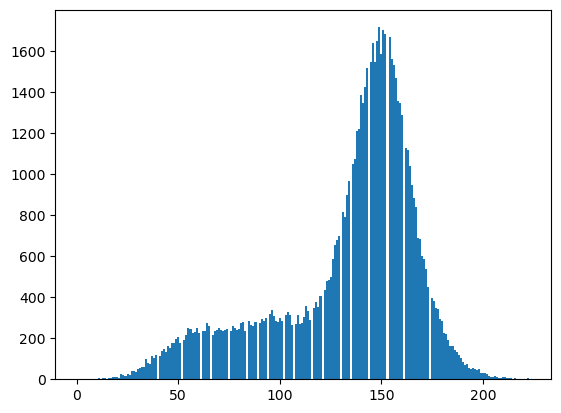

In [76]:
plt.hist(RGBvalues_satellite["Red"], bins=range(min(RGBvalues_satellite["Red"]), max(RGBvalues_satellite["Red"]) + 2),align='left', rwidth=100)

In [77]:
RGBvalues_satellite.describe()

,Red,Green,Blue,GLI,NGRDI
count,74304.000000,74304.000000,74304.000000,74304.000000,74304.000000
mean,133.431915,118.115754,102.084733,-0.002258,-0.065990
std,35.665124,33.095753,28.661597,0.033699,0.037625
min,1.000000,1.000000,1.000000,-0.909091,-0.931034
25%,119.000000,105.000000,90.000000,-0.004184,-0.066667
50%,143.000000,127.000000,109.000000,0.001957,-0.059701
75%,157.000000,140.000000,121.000000,0.007937,-0.053763
max,222.000000,201.000000,181.000000,0.154930,0.071429


(array([2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 5.000e+00, 6.000e+00, 8.000e+00, 0.000e+00,
        9.000e+00, 1.300e+01, 1.400e+01, 0.000e+00, 1.700e+01, 1.400e+01,
        0.000e+00, 1.700e+01, 2.100e+01, 3.300e+01, 0.000e+00, 3.000e+01,
        4.200e+01, 4.600e+01, 0.000e+00, 4.800e+01, 6.500e+01, 0.000e+00,
        8.400e+01, 8.400e+01, 1.190e+02, 0.000e+00, 1.230e+02, 1.590e+02,
        1.830e+02, 0.000e+00, 2.000e+02, 2.620e+02, 0.000e+00, 2.710e+02,
        3.520e+02, 4.270e+02, 0.000e+00, 5.130e+02, 6.070e+02, 7.410e+02,
        0.000e+00, 7.840e+02, 1.017e+03, 0.000e+00, 1.162e+03, 1.364e+03,
        1.597e+03, 0.000e+00, 1.661e+03, 1.915e+03, 0.000e+00, 2.115e+03,
        2.296e+03, 0.000e+00, 2.529e+03, 2.649e+03, 2.763e+03, 3.113e+03,
        0.000e+00, 3.044e+03, 3.232e+03, 3.036e+03, 3.306e+03, 0.000e+00,
        3.244e+03, 3.339e+03, 2.894e+0

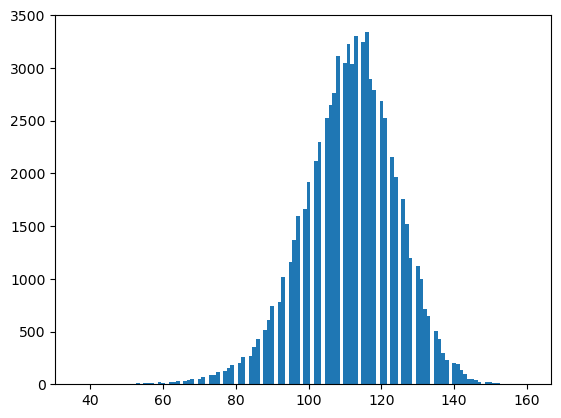

In [63]:
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Red']<=160]
plt.hist(RGBvalues_satellite["Red"], bins=range(min(RGBvalues_satellite["Red"]), max(RGBvalues_satellite["Red"]) + 2),align='left', rwidth=10)

In [78]:
# RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Red']>=0.001]
RGBvalues_satellite=RGBvalues_satellite.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
RGBvalues_satellite.columns = RGBvalues_satellite.columns.map('_'.join)
# RGBvalues_satellite.columns=[['file','RedMean', 'RedMedian', 'RedSum','Gr

In [79]:
RGBvalues_satellite.describe()

,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,133.431915,142.539729,19214.195736,118.115754,126.78876,17008.668605,102.084733,109.169574,14700.201550,-0.002258,0.001807,-0.325174,-0.065990,-0.059913,-9.502496
std,12.221872,7.236831,1759.949571,11.620363,6.74702,1673.332326,8.840593,4.965691,1273.045446,0.010848,0.005287,1.562179,0.012168,0.005256,1.752152
min,113.972222,122.500000,16412.000000,99.493056,108.50000,14327.000000,89.277778,95.000000,12856.000000,-0.074262,-0.017258,-10.693757,-0.144439,-0.080453,-20.799214
25%,123.833333,138.000000,17832.000000,109.085069,122.50000,15708.250000,95.020833,106.000000,13683.000000,-0.007618,-0.001870,-1.096938,-0.071863,-0.063203,-10.348306
50%,128.072917,141.000000,18442.500000,113.076389,125.50000,16283.000000,98.545139,108.000000,14190.500000,-0.000697,0.001773,-0.100359,-0.063063,-0.059912,-9.081046
75%,147.314236,148.000000,21213.250000,131.491319,132.00000,18934.750000,111.713542,112.125000,16086.750000,0.005705,0.005683,0.821454,-0.057724,-0.056311,-8.312241
max,163.069444,163.500000,23482.000000,143.944444,144.00000,20728.000000,122.520833,123.000000,17643.000000,0.015275,0.015874,2.199537,-0.046064,-0.045802,-6.633149


In [80]:
RGBvalues_satellite

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP6-4351_10_13,125.902778,139.5,18130,111.798611,125.0,16099,97.652778,107.5,14062,-0.005929,0.000768,-0.853793,-0.067477,-0.057239,-9.716634
1,Crawfordsville-TP6-4351_10_14,124.833333,136.0,17976,109.090278,120.0,15709,95.201389,104.5,13709,-0.007469,-0.004170,-1.075494,-0.073050,-0.064639,-10.519149
2,Crawfordsville-TP6-4351_10_15,129.444444,142.5,18640,114.965278,128.0,16555,99.236111,111.0,14290,0.003147,0.001869,0.453220,-0.059743,-0.060552,-8.603014
3,Crawfordsville-TP6-4351_10_16,125.750000,140.0,18108,111.201389,123.5,16013,97.569444,107.0,14050,-0.004335,-0.001783,-0.624195,-0.065101,-0.059701,-9.374547
4,Crawfordsville-TP6-4351_10_17,120.479167,136.5,17349,105.041667,120.0,15126,91.729167,104.0,13209,-0.014925,-0.007226,-2.149228,-0.081561,-0.069397,-11.744844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Crawfordsville-TP6-4353_9_42,154.402778,154.0,22234,139.076389,138.0,20027,117.791667,117.0,16962,0.011195,0.011111,1.612124,-0.052116,-0.051963,-7.504687
512,Crawfordsville-TP6-4353_9_43,151.694444,152.0,21844,135.020833,137.0,19443,115.541667,116.5,16638,0.005439,0.005111,0.783266,-0.058170,-0.057990,-8.376479
513,Crawfordsville-TP6-4353_9_44,152.361111,155.0,21940,135.972222,138.0,19580,114.375000,117.0,16470,0.009852,0.009141,1.418631,-0.056945,-0.056178,-8.200110
514,Crawfordsville-TP6-4353_9_45,147.173611,147.5,21193,131.583333,131.5,18948,110.590278,111.0,15925,0.010741,0.010646,1.546666,-0.055905,-0.055881,-8.050355


In [81]:
RGBvalues_satellite.to_csv("RGBvalues_satellite_TP6_afteroutliers.csv", index=False)

In [35]:
RGBvalues_uav=RGB('/home/schnablelab/Documents/ImageDataset/RGB_UAV/Crawfordsville/Hybrids/CroppedTP2/')

/tmp/ipykernel_300213/2187856588.py:21: RuntimeWarning: invalid value encountered in scalar divide
  GLI=(2*g-r-b)/(2*g+r+b)
/tmp/ipykernel_300213/2187856588.py:25: RuntimeWarning: invalid value encountered in scalar divide
  NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))


(array([3.491238e+06, 2.100770e+05, 3.509770e+05, 4.605060e+05,
        5.719210e+05, 6.821020e+05, 7.804300e+05, 8.740530e+05,
        9.536380e+05, 1.011501e+06, 1.044458e+06, 1.062212e+06,
        1.060766e+06, 1.042762e+06, 1.012011e+06, 9.694900e+05,
        9.302870e+05, 8.862250e+05, 8.443950e+05, 8.076240e+05,
        7.737640e+05, 7.444640e+05, 7.170010e+05, 6.947210e+05,
        6.726840e+05, 6.566270e+05, 6.412840e+05, 6.299310e+05,
        6.209260e+05, 6.127360e+05, 6.059210e+05, 6.015290e+05,
        5.973750e+05, 5.973370e+05, 5.975200e+05, 5.960040e+05,
        6.005830e+05, 6.035130e+05, 6.096410e+05, 6.137330e+05,
        6.209650e+05, 6.301760e+05, 6.390020e+05, 6.473570e+05,
        6.590710e+05, 6.707930e+05, 6.818320e+05, 6.942580e+05,
        7.065840e+05, 7.187690e+05, 7.290250e+05, 7.417450e+05,
        7.528480e+05, 7.632510e+05, 7.718080e+05, 7.802660e+05,
        7.890960e+05, 7.976790e+05, 8.058650e+05, 8.138670e+05,
        8.218910e+05, 8.278200e+05, 8.34

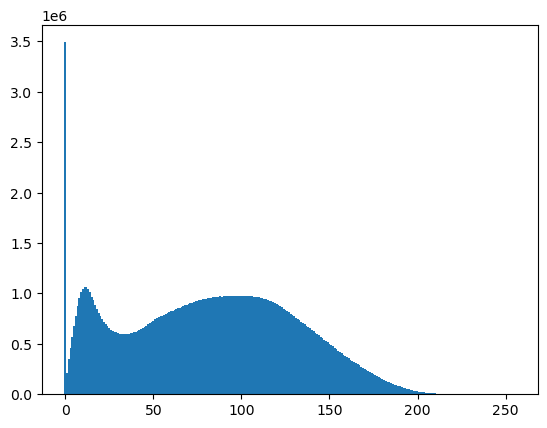

In [37]:
plt.hist(RGBvalues_uav["Red"], bins=range(min(RGBvalues_uav["Red"]), max(RGBvalues_uav["Red"]) + 2),align='left', rwidth=100)

In [40]:
RGBvalues_uav.describe()

,Red,Green,Blue,GLI,NGRDI
count,1.351792e+08,1.351792e+08,1.351792e+08,1.320337e+08,1.320019e+08
mean,8.173258e+01,1.187726e+02,7.412769e+01,2.236957e-01,1.860947e-01
std,4.801536e+01,6.561186e+01,4.913274e+01,1.238204e-01,1.295826e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,4.300000e+01,6.400000e+01,3.100000e+01,1.661972e-01,1.383812e-01
50%,8.300000e+01,1.290000e+02,7.400000e+01,2.197309e-01,1.935484e-01
75%,1.180000e+02,1.720000e+02,1.100000e+02,2.767857e-01,2.444444e-01
max,2.000000e+02,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00


In [41]:
RGBvalues_uav=RGBvalues_uav.loc[RGBvalues_uav['Red']>=0.001]
RGBvalues_uav=RGBvalues_uav.loc[RGBvalues_uav['Red']<=225]

(array([ 210077.,  350977.,  460506.,  571921.,  682102.,  780430.,
         874053.,  953638., 1011501., 1044458., 1062212., 1060766.,
        1042762., 1012011.,  969490.,  930287.,  886225.,  844395.,
         807624.,  773764.,  744464.,  717001.,  694721.,  672684.,
         656627.,  641284.,  629931.,  620926.,  612736.,  605921.,
         601529.,  597375.,  597337.,  597520.,  596004.,  600583.,
         603513.,  609641.,  613733.,  620965.,  630176.,  639002.,
         647357.,  659071.,  670793.,  681832.,  694258.,  706584.,
         718769.,  729025.,  741745.,  752848.,  763251.,  771808.,
         780266.,  789096.,  797679.,  805865.,  813867.,  821891.,
         827820.,  834526.,  845104.,  852829.,  858590.,  868552.,
         874650.,  881259.,  889639.,  893988.,  903682.,  907639.,
         914353.,  922754.,  927263.,  932644.,  936498.,  940457.,
         947387.,  949667.,  953756.,  956658.,  958651.,  963993.,
         963414.,  967163.,  966409.,  970349., 

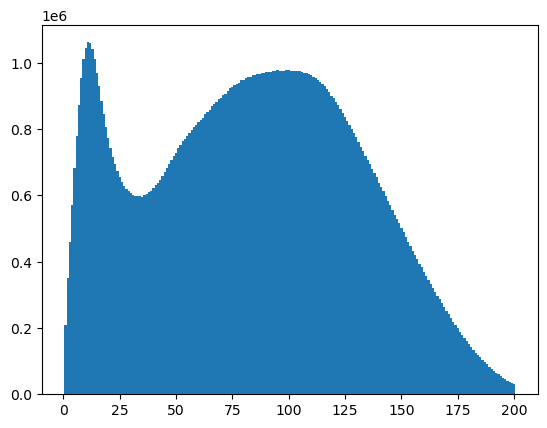

In [43]:
plt.hist(RGBvalues_uav["Red"], bins=range(min(RGBvalues_uav["Red"]), max(RGBvalues_uav["Red"]) + 2),align='left', rwidth=100)

In [89]:
# RGBvalues_uav=RGBvalues_uav.loc[RGBvalues_uav['Red']>=25]
# RGBvalues_uav=RGBvalues_uav.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
# RGBvalues_uav.columns = RGBvalues_uav.columns.map('_'.join)

In [87]:
RGBvalues_uav

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,CrawfordsvilleV2-TP1-4351_10_13,76.707882,77.0,19789176,115.968823,124.0,29917753,71.840636,70.0,18533519,0.242406,0.236364,62536.192305,0.207680,0.212389,53577.547888
1,CrawfordsvilleV2-TP1-4351_10_14,63.634761,60.0,16441695,101.242128,103.0,26158536,61.261638,56.0,15828537,0.251475,0.256351,64975.077138,0.228157,0.240310,58950.217584
2,CrawfordsvilleV2-TP1-4351_10_15,94.582687,99.0,24392402,127.516152,138.0,32885778,84.797332,87.0,21868808,0.184786,0.177994,47655.407368,0.145040,0.149701,37405.187002
3,CrawfordsvilleV2-TP1-4351_10_16,77.862975,78.0,20166744,114.440717,121.0,29640489,71.784423,70.0,18592381,0.223554,0.220544,57901.199796,0.190219,0.196203,49267.174942
4,CrawfordsvilleV2-TP1-4351_10_17,72.752044,70.0,18814115,108.746905,111.0,28122602,65.943099,62.0,17053281,0.234707,0.238095,60696.708831,0.194973,0.209756,50421.207239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,CrawfordsvilleV2-TP1-4353_9_42,91.713689,99.0,22797455,136.158457,154.0,33845180,85.507149,89.0,21254683,0.231182,0.225806,57465.431943,0.197661,0.203704,49132.927254
512,CrawfordsvilleV2-TP1-4353_9_43,88.458671,91.0,22068227,128.827478,140.0,32139235,83.899649,84.0,20930865,0.214964,0.210884,53628.074443,0.183599,0.191977,45803.261933
513,CrawfordsvilleV2-TP1-4353_9_44,104.304750,110.0,25993891,144.930160,161.0,36118190,92.614764,97.0,23080618,0.203289,0.198347,50661.813777,0.161106,0.167742,40149.307240
514,CrawfordsvilleV2-TP1-4353_9_45,90.724570,94.0,22637504,133.270420,145.0,33253502,79.895856,80.0,19935534,0.243118,0.232472,60662.637060,0.194686,0.198413,48577.947579


In [88]:
RGBvalues_uav.to_csv("RGBuav_TP1.csv", index=False)